PREPROCESS TRAIN DATA

In [70]:
import pandas as pd
# Path to your CSV file
file_path = r"GUIDE_Train.csv"

# Target row count per class
target_rows_per_class = 500_000

# Initialize dictionaries to store sampled data for each class
samples_per_class = {'BenignPositive': [], 'TruePositive': [], 'FalsePositive': []}

# Define chunk size to avoid memory overload
chunk_size = 100_000

# Read the CSV file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # For each class, sample rows if the target has not been reached
    for class_value in samples_per_class.keys():
        # Filter rows of the current class
        class_rows = chunk[chunk['IncidentGrade'] == class_value]
        
        # Calculate how many more rows are needed for this class
        remaining_rows = target_rows_per_class - sum(len(df) for df in samples_per_class[class_value])
        
        # If more rows are needed, sample accordingly
        if remaining_rows > 0:
            samples_per_class[class_value].append(class_rows.sample(n=min(remaining_rows, len(class_rows))))

    # Stop reading further chunks if we’ve collected enough rows for each class
    if all(sum(len(df) for df in samples) >= target_rows_per_class for samples in samples_per_class.values()):
        break

# Concatenate samples to create the final balanced dataset
df_train = pd.concat([pd.concat(samples) for samples in samples_per_class.values()])

/var/folders/9h/_5446nyj2l58_dbq96slb5qm0000gn/T/ipykernel_988/1112580641.py:15: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/var/folders/9h/_5446nyj2l58_dbq96slb5qm0000gn/T/ipykernel_988/1112580641.py:15: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/var/folders/9h/_5446nyj2l58_dbq96slb5qm0000gn/T/ipykernel_988/1112580641.py:15: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/var/folders/9h/_5446nyj2l58_dbq96slb5qm0000gn/T/ipykernel_988/1112580641.py:15: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/var/folders/9h/_5446nyj2l58

In [71]:
df_train.shape

(1500000, 45)

In [72]:
df_train['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    500000
TruePositive      500000
FalsePositive     500000
Name: count, dtype: int64

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500000 entries, 70781 to 2355877
Data columns (total 45 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  1500000 non-null  int64  
 1   OrgId               1500000 non-null  int64  
 2   IncidentId          1500000 non-null  int64  
 3   AlertId             1500000 non-null  int64  
 4   Timestamp           1500000 non-null  object 
 5   DetectorId          1500000 non-null  int64  
 6   AlertTitle          1500000 non-null  int64  
 7   Category            1500000 non-null  object 
 8   MitreTechniques     662565 non-null   object 
 9   IncidentGrade       1500000 non-null  object 
 10  ActionGrouped       813 non-null      object 
 11  ActionGranular      813 non-null      object 
 12  EntityType          1500000 non-null  object 
 13  EvidenceRole        1500000 non-null  object 
 14  DeviceId            1500000 non-null  int64  
 15  Sha256          

In [74]:
df_train.isna().sum() 

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques        837435
IncidentGrade               0
ActionGrouped         1499187
ActionGranular        1499187
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        1485127
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          1489079
FileName                    0
FolderPath

In [75]:
print(df_train.duplicated().sum())
df_train.drop_duplicates(inplace=True)
print(df_train.duplicated().sum())

797
0


In [76]:
# Dropping rows with 50% or more null values 
thresh = len(df_train) * 0.5   #thresh has a int value of no of 50% rows
df_train = df_train.dropna(thresh = thresh,axis=1)

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499203 entries, 70781 to 2355877
Data columns (total 35 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Id                  1499203 non-null  int64 
 1   OrgId               1499203 non-null  int64 
 2   IncidentId          1499203 non-null  int64 
 3   AlertId             1499203 non-null  int64 
 4   Timestamp           1499203 non-null  object
 5   DetectorId          1499203 non-null  int64 
 6   AlertTitle          1499203 non-null  int64 
 7   Category            1499203 non-null  object
 8   IncidentGrade       1499203 non-null  object
 9   EntityType          1499203 non-null  object
 10  EvidenceRole        1499203 non-null  object
 11  DeviceId            1499203 non-null  int64 
 12  Sha256              1499203 non-null  int64 
 13  IpAddress           1499203 non-null  int64 
 14  Url                 1499203 non-null  int64 
 15  AccountSid          1499203 non-n

In [78]:
df_train.isna().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [79]:
# Feature engineering - Converting Timestamp column into Day, Month and Hour

df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'])
df_train['Day']=df_train['Timestamp'].dt.day
df_train['Month']=df_train['Timestamp'].dt.month
df_train['Hour']=df_train['Timestamp'].dt.hour
df_train.drop('Timestamp',axis=1,inplace=True)

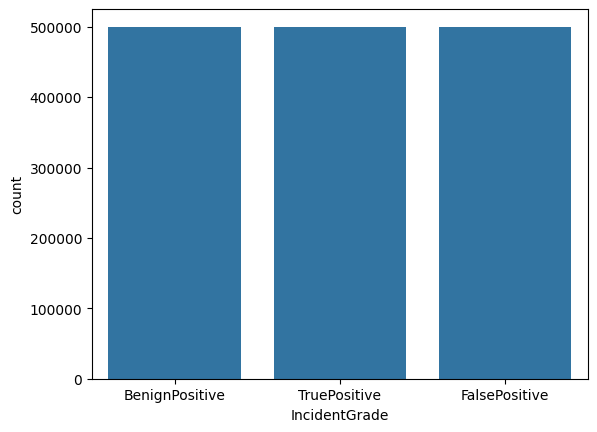

In [80]:
# Count plot by Target column classes 
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='IncidentGrade', data=df_train)
plt.show()

In [81]:
df_train['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    499999
FalsePositive     499859
TruePositive      499345
Name: count, dtype: int64

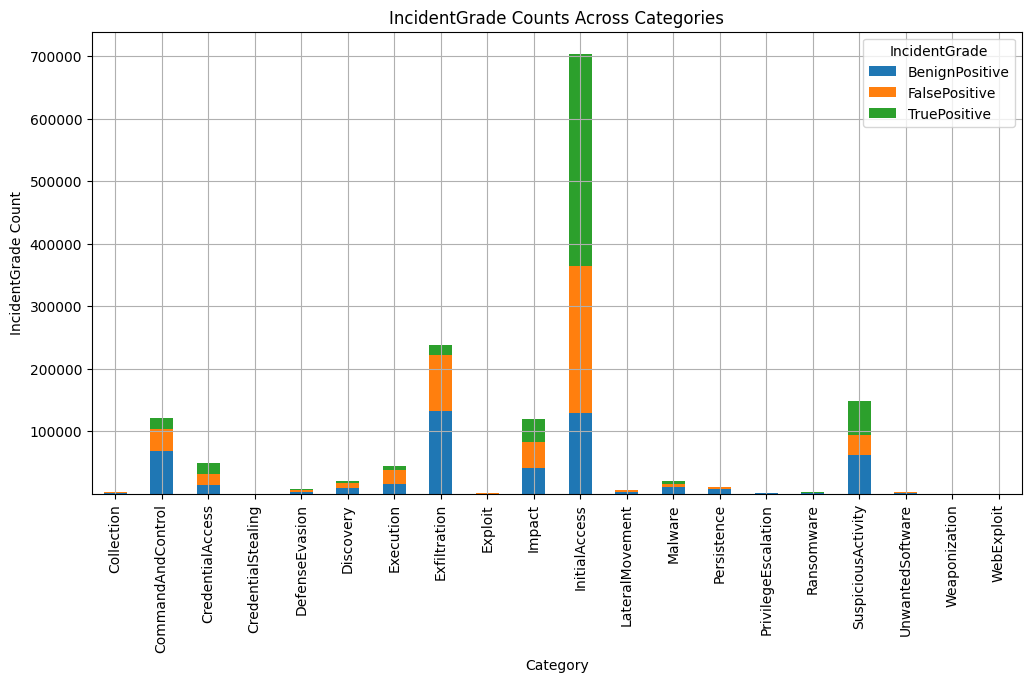

In [82]:
# Bar plot of IncidentGrade count by Category

grouped_data=df_train.groupby(["Category","IncidentGrade"]).size().unstack()

# Plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Category')
plt.ylabel('IncidentGrade Count')
plt.title('IncidentGrade Counts Across Categories')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

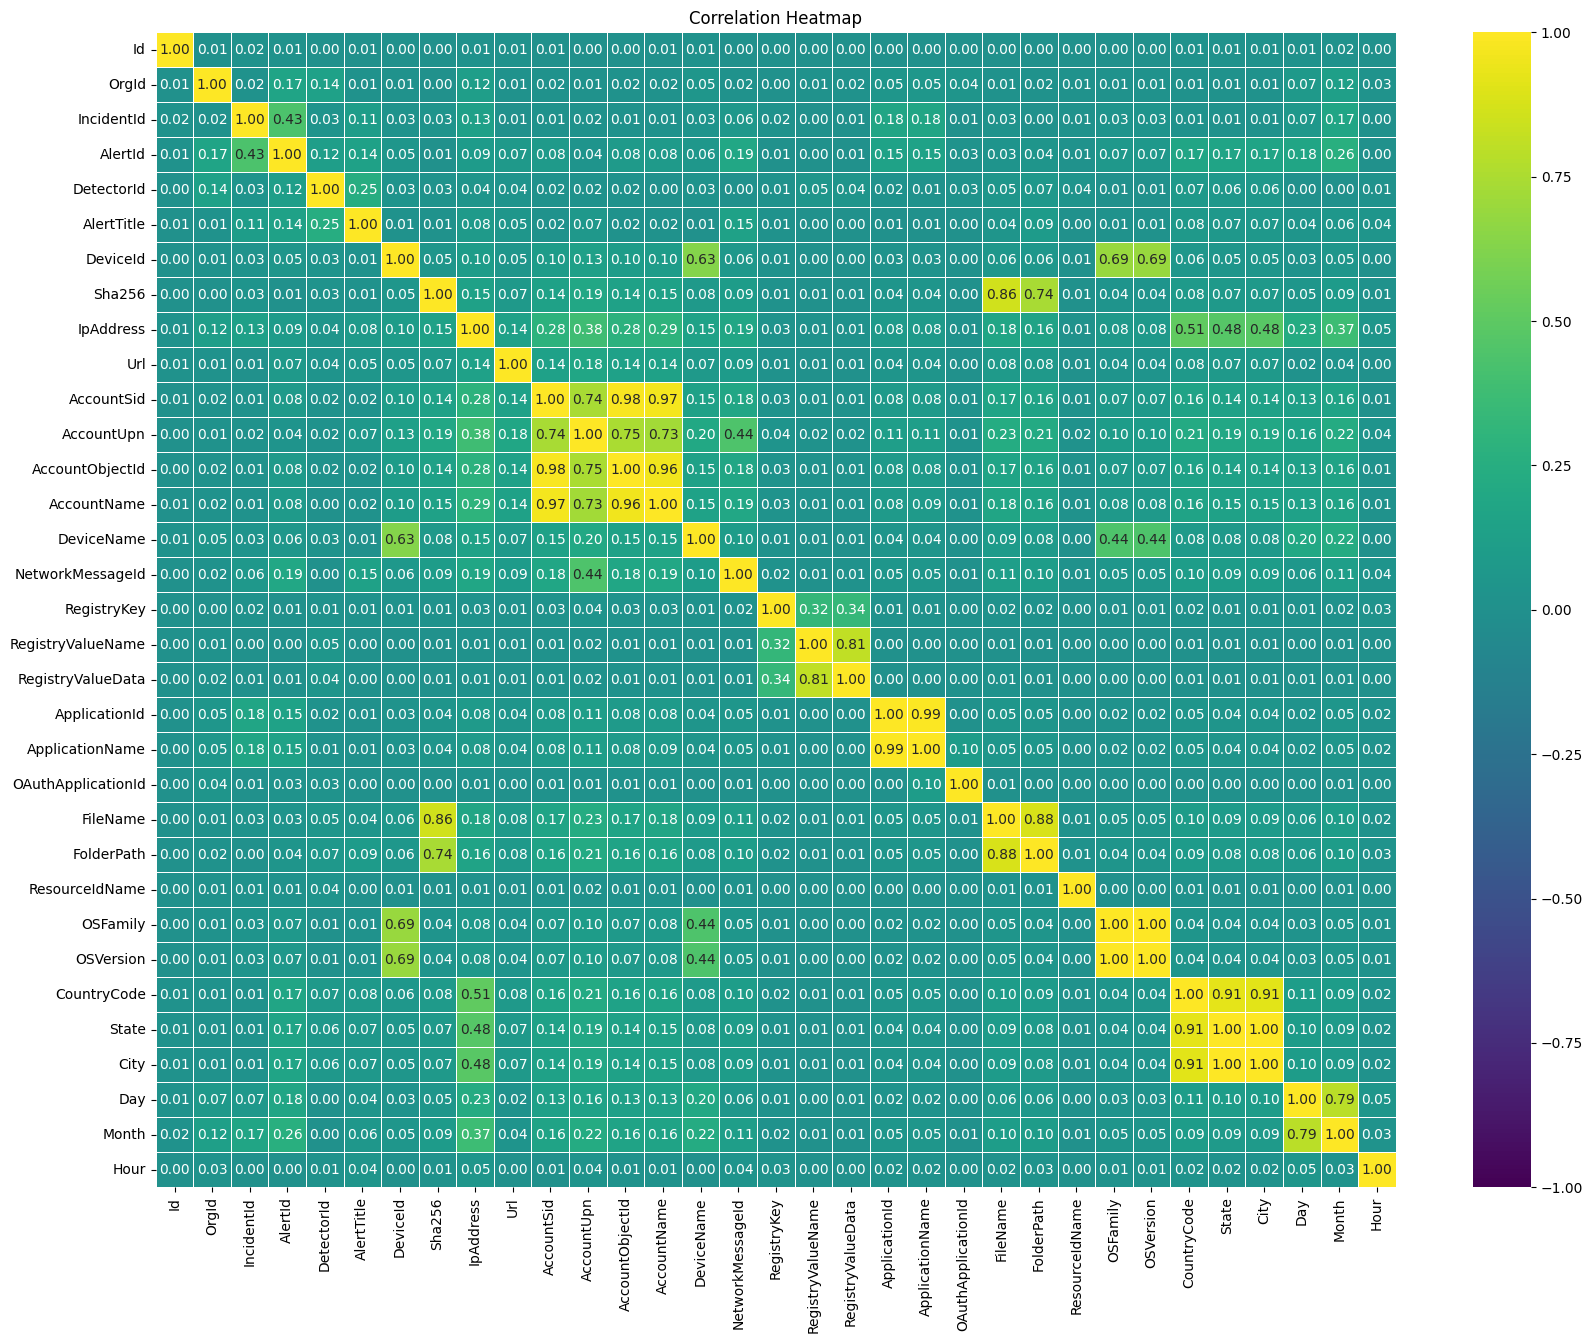

In [83]:
# Correlation heatmap for all numerical columns in our dataset

numerical_df = df_train.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr().abs()

# Plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [84]:
import numpy as np
# Setting a correlation threshold
threshold = 0.8

# Find pairs of columns with high correlations
high_corr_var = np.where(corr_matrix > threshold)
high_corr_pairs = [(numerical_df.columns[x], numerical_df.columns[y]) 
                    for x, y in zip(*high_corr_var) 
                    if x != y and x < y]
high_corr_pairs

[('Sha256', 'FileName'),
 ('AccountSid', 'AccountObjectId'),
 ('AccountSid', 'AccountName'),
 ('AccountObjectId', 'AccountName'),
 ('RegistryValueName', 'RegistryValueData'),
 ('ApplicationId', 'ApplicationName'),
 ('FileName', 'FolderPath'),
 ('OSFamily', 'OSVersion'),
 ('CountryCode', 'State'),
 ('CountryCode', 'City'),
 ('State', 'City')]

In [85]:
# Create a list of columns to remove
columns_to_remove = set()
for col1, col2 in high_corr_pairs:
        columns_to_remove.add(col2)  # Default to adding the second column in each pair

# Convert to list
columns_to_remove = list(columns_to_remove)

#print(columns_to_remove)
# Drop the redundant columns
df_cleaned_corr = df_train.drop(columns=columns_to_remove)

# Verify the cleaned DataFrame
print("Columns removed:", columns_to_remove)
df_cleaned_corr.head()

Columns removed: ['AccountName', 'ApplicationName', 'FolderPath', 'AccountObjectId', 'City', 'FileName', 'RegistryValueData', 'State', 'OSVersion']


,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
70781,1451698946132,67,167360,16711,1,1,InitialAccess,BenignPositive,MailCluster,Related,...,1631,635,2251,881,3586,5,242,9,6,4
75595,1391569405640,70,15621,67139,1,1,InitialAccess,BenignPositive,MailMessage,Related,...,1631,635,2251,881,3586,5,242,11,6,20
71401,558345752058,203,84994,775739,2,2,CommandAndControl,BenignPositive,Url,Related,...,1631,635,2251,881,3586,5,242,12,6,21
51681,42949673824,727,14795,789530,447,473,InitialAccess,BenignPositive,AzureResource,Impacted,...,1631,635,2251,881,1010,5,242,9,6,0
11563,1245540518374,132,77518,461263,13,11,InitialAccess,BenignPositive,MailMessage,Related,...,1631,635,2251,881,3586,5,242,11,6,16


In [86]:
df_cleaned_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499203 entries, 70781 to 2355877
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Id                  1499203 non-null  int64 
 1   OrgId               1499203 non-null  int64 
 2   IncidentId          1499203 non-null  int64 
 3   AlertId             1499203 non-null  int64 
 4   DetectorId          1499203 non-null  int64 
 5   AlertTitle          1499203 non-null  int64 
 6   Category            1499203 non-null  object
 7   IncidentGrade       1499203 non-null  object
 8   EntityType          1499203 non-null  object
 9   EvidenceRole        1499203 non-null  object
 10  DeviceId            1499203 non-null  int64 
 11  Sha256              1499203 non-null  int64 
 12  IpAddress           1499203 non-null  int64 
 13  Url                 1499203 non-null  int64 
 14  AccountSid          1499203 non-null  int64 
 15  AccountUpn          1499203 non-n

ENCODING

In [87]:
import pandas as pd

# Identify the columns with object datatype (categorical columns)
object_columns = df_cleaned_corr.select_dtypes(include=['object']).columns

# Apply pd.get_dummies to the object columns to perform one-hot encoding
df_cleaned_corr_encoded = pd.get_dummies(df_cleaned_corr, columns=object_columns, drop_first=False)

df_cleaned_corr_encoded =df_cleaned_corr_encoded.astype(int)

df_cleaned_corr_encoded

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,EntityType_Nic,EntityType_OAuthApplication,EntityType_Process,EntityType_RegistryKey,EntityType_RegistryValue,EntityType_SecurityGroup,EntityType_Url,EntityType_User,EvidenceRole_Impacted,EvidenceRole_Related
70781,1451698946132,67,167360,16711,1,1,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,0,1
75595,1391569405640,70,15621,67139,1,1,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,0,1
71401,558345752058,203,84994,775739,2,2,98799,138268,360606,1566,...,0,0,0,0,0,0,1,0,0,1
51681,42949673824,727,14795,789530,447,473,46723,138268,360606,160396,...,0,0,0,0,0,0,0,0,1,0
11563,1245540518374,132,77518,461263,13,11,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316310,721554506349,17,153195,28023,20,6405,98799,12817,360606,160396,...,0,0,0,0,0,0,0,0,1,0
2306997,1030792152745,7,156,672,22,10,98799,138268,1358,160396,...,0,0,0,0,0,0,0,0,0,1
2318448,1013612287079,184,3538,362342,25,17,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,1,0
2310559,678604838045,104,316,2532,11,9,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,1,0


In [89]:
df_cleaned_corr_encoded.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
DetectorId                  0
                           ..
EntityType_SecurityGroup    0
EntityType_Url              0
EntityType_User             0
EvidenceRole_Impacted       0
EvidenceRole_Related        0
Length: 77, dtype: int64

In [90]:
import pickle

# Save the one-hot encoded DataFrame using pickle
with open('onehot_encoded_data.pkl', 'wb') as f:
    pickle.dump(df_cleaned_corr_encoded, f)


In [92]:
df_cleaned_corr_encoded.to_csv('train_data_processed.csv', index=False)

PREPROCESSING TEST DATA

In [93]:
# Path to your CSV file
file_path = r"GUIDE_Test.csv"

# Target row count per class
target_rows_per_class = 500_000

# Initialize dictionaries to store sampled data for each class
samples_per_class = {'BenignPositive': [], 'TruePositive': [], 'FalsePositive': []}

# Define chunk size to avoid memory overload
chunk_size = 100_000

# Read the CSV file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # For each class, sample rows if the target has not been reached
    for class_value in samples_per_class.keys():
        # Filter rows of the current class
        class_rows = chunk[chunk['IncidentGrade'] == class_value]
        
        # Calculate how many more rows are needed for this class
        remaining_rows = target_rows_per_class - sum(len(df) for df in samples_per_class[class_value])
        
        # If more rows are needed, sample accordingly
        if remaining_rows > 0:
            samples_per_class[class_value].append(class_rows.sample(n=min(remaining_rows, len(class_rows))))

    # Stop reading further chunks if we’ve collected enough rows for each class
    if all(sum(len(df) for df in samples) >= target_rows_per_class for samples in samples_per_class.values()):
        break

# Concatenate samples to create the final balanced dataset
df_test = pd.concat([pd.concat(samples) for samples in samples_per_class.values()])

/var/folders/9h/_5446nyj2l58_dbq96slb5qm0000gn/T/ipykernel_988/1683880972.py:14: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/var/folders/9h/_5446nyj2l58_dbq96slb5qm0000gn/T/ipykernel_988/1683880972.py:14: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/var/folders/9h/_5446nyj2l58_dbq96slb5qm0000gn/T/ipykernel_988/1683880972.py:14: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/var/folders/9h/_5446nyj2l58_dbq96slb5qm0000gn/T/ipykernel_988/1683880972.py:14: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/var/folders/9h/_5446n

In [94]:
df_test['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    500000
TruePositive      500000
FalsePositive     500000
Name: count, dtype: int64

In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500000 entries, 99770 to 2228963
Data columns (total 46 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  1500000 non-null  int64  
 1   OrgId               1500000 non-null  int64  
 2   IncidentId          1500000 non-null  int64  
 3   AlertId             1500000 non-null  int64  
 4   Timestamp           1500000 non-null  object 
 5   DetectorId          1500000 non-null  int64  
 6   AlertTitle          1500000 non-null  int64  
 7   Category            1500000 non-null  object 
 8   MitreTechniques     689747 non-null   object 
 9   IncidentGrade       1500000 non-null  object 
 10  ActionGrouped       777 non-null      object 
 11  ActionGranular      777 non-null      object 
 12  EntityType          1500000 non-null  object 
 13  EvidenceRole        1500000 non-null  object 
 14  DeviceId            1500000 non-null  int64  
 15  Sha256          

In [96]:
# Following the same steps that have been applied on Train dataset

df_test.drop_duplicates(inplace=True)
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'])
df_test['Day']=df_test['Timestamp'].dt.day
df_test['Month']=df_test['Timestamp'].dt.month
df_test['Hour']=df_test['Timestamp'].dt.hour
df_test.drop('Timestamp',axis=1,inplace=True)

In [97]:
df_test.drop(['AccountObjectId', 'ApplicationName', 'FolderPath', 'State', 'FileName', 'OSVersion', 'AccountName', 'City', 'RegistryValueData'],axis=1, inplace= True)
df_test.drop('Usage',axis=1,inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499985 entries, 99770 to 2228963
Data columns (total 38 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  1499985 non-null  int64  
 1   OrgId               1499985 non-null  int64  
 2   IncidentId          1499985 non-null  int64  
 3   AlertId             1499985 non-null  int64  
 4   DetectorId          1499985 non-null  int64  
 5   AlertTitle          1499985 non-null  int64  
 6   Category            1499985 non-null  object 
 7   MitreTechniques     689737 non-null   object 
 8   IncidentGrade       1499985 non-null  object 
 9   ActionGrouped       777 non-null      object 
 10  ActionGranular      777 non-null      object 
 11  EntityType          1499985 non-null  object 
 12  EvidenceRole        1499985 non-null  object 
 13  DeviceId            1499985 non-null  int64  
 14  Sha256              1499985 non-null  int64  
 15  IpAddress       

In [98]:
# Keeping only required columns as we have done for train dataset.

df_test = df_test[['Id','OrgId','IncidentId', 'AlertId','DetectorId','AlertTitle','Category','IncidentGrade','EntityType','EvidenceRole','DeviceId','Sha256','IpAddress','Url','AccountSid','AccountUpn','DeviceName','NetworkMessageId','RegistryKey','RegistryValueName','ApplicationId','OAuthApplicationId','ResourceIdName','OSFamily','CountryCode','Day','Month','Hour']]
df_test.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
99770,420906797306,52,1771,97,99,670,CommandAndControl,BenignPositive,Ip,Related,...,1631,635,2251,881,3586,5,242,23,5,23
26515,1709396984822,56,67584,42664,621,242,CredentialAccess,BenignPositive,Ip,Related,...,1631,635,2251,881,3586,5,242,9,6,1
3011,197568497854,52,2127,28,99,691,CommandAndControl,BenignPositive,Ip,Related,...,1631,635,2251,881,3586,5,242,30,5,20
72112,309237647928,1724,70684,1395009,5,49,SuspiciousActivity,BenignPositive,User,Impacted,...,1631,635,2251,881,3586,5,242,10,6,20
23133,1529008359085,26,109432,1437786,160,11229,Malware,BenignPositive,Process,Related,...,1631,635,2251,881,3586,5,242,6,6,9


In [99]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499985 entries, 99770 to 2228963
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Id                  1499985 non-null  int64 
 1   OrgId               1499985 non-null  int64 
 2   IncidentId          1499985 non-null  int64 
 3   AlertId             1499985 non-null  int64 
 4   DetectorId          1499985 non-null  int64 
 5   AlertTitle          1499985 non-null  int64 
 6   Category            1499985 non-null  object
 7   IncidentGrade       1499985 non-null  object
 8   EntityType          1499985 non-null  object
 9   EvidenceRole        1499985 non-null  object
 10  DeviceId            1499985 non-null  int64 
 11  Sha256              1499985 non-null  int64 
 12  IpAddress           1499985 non-null  int64 
 13  Url                 1499985 non-null  int64 
 14  AccountSid          1499985 non-null  int64 
 15  AccountUpn          1499985 non-n

In [100]:
import pandas as pd

# Identify the columns with object datatype (categorical columns)
object_columns = df_cleaned_corr.select_dtypes(include=['object']).columns

# Apply pd.get_dummies to the object columns to perform one-hot encoding
df_test = pd.get_dummies(df_cleaned_corr, columns=object_columns, drop_first=False)

df_test =df_test.astype(int)

df_test

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,EntityType_Nic,EntityType_OAuthApplication,EntityType_Process,EntityType_RegistryKey,EntityType_RegistryValue,EntityType_SecurityGroup,EntityType_Url,EntityType_User,EvidenceRole_Impacted,EvidenceRole_Related
70781,1451698946132,67,167360,16711,1,1,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,0,1
75595,1391569405640,70,15621,67139,1,1,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,0,1
71401,558345752058,203,84994,775739,2,2,98799,138268,360606,1566,...,0,0,0,0,0,0,1,0,0,1
51681,42949673824,727,14795,789530,447,473,46723,138268,360606,160396,...,0,0,0,0,0,0,0,0,1,0
11563,1245540518374,132,77518,461263,13,11,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316310,721554506349,17,153195,28023,20,6405,98799,12817,360606,160396,...,0,0,0,0,0,0,0,0,1,0
2306997,1030792152745,7,156,672,22,10,98799,138268,1358,160396,...,0,0,0,0,0,0,0,0,0,1
2318448,1013612287079,184,3538,362342,25,17,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,1,0
2310559,678604838045,104,316,2532,11,9,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,1,0


In [101]:
df_test.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
DetectorId                  0
                           ..
EntityType_SecurityGroup    0
EntityType_Url              0
EntityType_User             0
EvidenceRole_Impacted       0
EvidenceRole_Related        0
Length: 77, dtype: int64

In [102]:
df_test

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,EntityType_Nic,EntityType_OAuthApplication,EntityType_Process,EntityType_RegistryKey,EntityType_RegistryValue,EntityType_SecurityGroup,EntityType_Url,EntityType_User,EvidenceRole_Impacted,EvidenceRole_Related
70781,1451698946132,67,167360,16711,1,1,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,0,1
75595,1391569405640,70,15621,67139,1,1,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,0,1
71401,558345752058,203,84994,775739,2,2,98799,138268,360606,1566,...,0,0,0,0,0,0,1,0,0,1
51681,42949673824,727,14795,789530,447,473,46723,138268,360606,160396,...,0,0,0,0,0,0,0,0,1,0
11563,1245540518374,132,77518,461263,13,11,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316310,721554506349,17,153195,28023,20,6405,98799,12817,360606,160396,...,0,0,0,0,0,0,0,0,1,0
2306997,1030792152745,7,156,672,22,10,98799,138268,1358,160396,...,0,0,0,0,0,0,0,0,0,1
2318448,1013612287079,184,3538,362342,25,17,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,1,0
2310559,678604838045,104,316,2532,11,9,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,1,0


In [103]:
with open('onehot_encoded_data_test.pkl', 'wb') as f:
    pickle.dump(df_test, f)


In [104]:
df_test.to_csv('test_data_processed.csv', index=False)

MODEL TRAINING

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from collections import Counter
import numpy as np
from scipy.stats import randint

In [106]:
# Read the csv file using pandas
df_train = pd.read_csv(r"train_data_processed.csv")
df_train.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,EntityType_Nic,EntityType_OAuthApplication,EntityType_Process,EntityType_RegistryKey,EntityType_RegistryValue,EntityType_SecurityGroup,EntityType_Url,EntityType_User,EvidenceRole_Impacted,EvidenceRole_Related
0,1451698946132,67,167360,16711,1,1,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,0,1
1,1391569405640,70,15621,67139,1,1,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,0,1
2,558345752058,203,84994,775739,2,2,98799,138268,360606,1566,...,0,0,0,0,0,0,1,0,0,1
3,42949673824,727,14795,789530,447,473,46723,138268,360606,160396,...,0,0,0,0,0,0,0,0,1,0
4,1245540518374,132,77518,461263,13,11,98799,138268,360606,160396,...,0,0,0,0,0,0,0,0,0,1


In [107]:
print(df_train.columns)

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'DeviceName', 'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'ApplicationId', 'OAuthApplicationId', 'ResourceIdName', 'OSFamily',
       'CountryCode', 'Day', 'Month', 'Hour', 'Category_Collection',
       'Category_CommandAndControl', 'Category_CredentialAccess',
       'Category_CredentialStealing', 'Category_DefenseEvasion',
       'Category_Discovery', 'Category_Execution', 'Category_Exfiltration',
       'Category_Exploit', 'Category_Impact', 'Category_InitialAccess',
       'Category_LateralMovement', 'Category_Malware', 'Category_Persistence',
       'Category_PrivilegeEscalation', 'Category_Ransomware',
       'Category_SuspiciousActivity', 'Category_UnwantedSoftware',
       'Category_Weaponization', 'Category_WebExploit',
       'IncidentGrade_BenignPositive', 'IncidentGrade_FalsePositive',
       'Incid

In [138]:
# Split data into features (X) and target (y)
X = df_train.drop(['IncidentGrade_BenignPositive', 'IncidentGrade_FalsePositive', 'IncidentGrade_TruePositive'], axis=1)
y = df_train[['IncidentGrade_BenignPositive', 'IncidentGrade_FalsePositive', 'IncidentGrade_TruePositive']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


                   Feature  Importance
1                    OrgId    0.220187
2               IncidentId    0.148131
3                  AlertId    0.104630
4               DetectorId    0.099390
5               AlertTitle    0.078352
21                     Day    0.048423
0                       Id    0.047390
23                    Hour    0.032240
11              AccountUpn    0.028524
10              AccountSid    0.022688
34  Category_InitialAccess    0.018609
8                IpAddress    0.015883
31   Category_Exfiltration    0.011676
13        NetworkMessageId    0.011526
20             CountryCode    0.011125


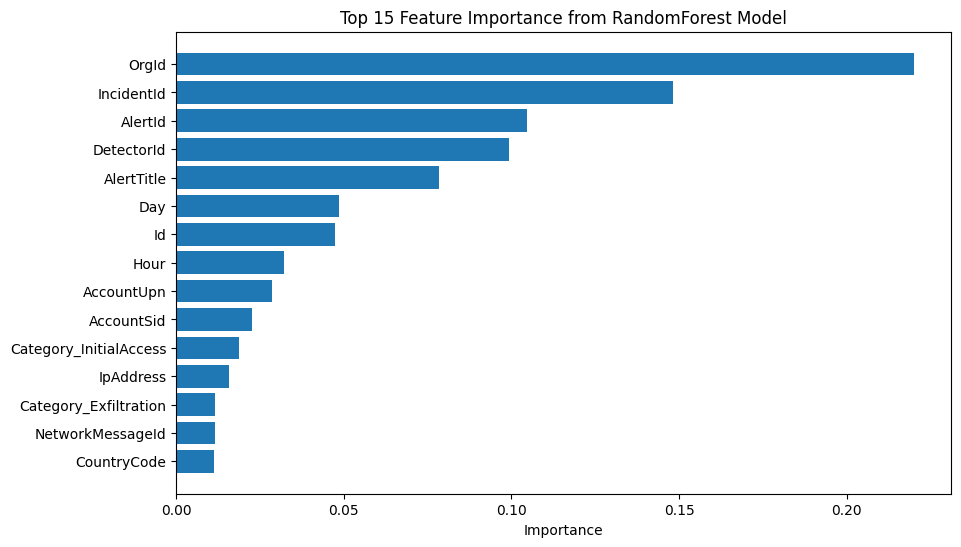

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)  # Train the model

# Get the feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to show the feature importances
feature_names = X_train.columns  # Assuming X_train is your feature set
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 15 most important features
top_15_features = feature_importance_df.head(15)
print(top_15_features)

# Plot the top 15 most important features
plt.figure(figsize=(10, 6))
plt.barh(top_15_features['Feature'], top_15_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance from RandomForest Model')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [141]:
# Selecting only the top 15 features based on importance
top_15_feature_names = top_15_features['Feature'].tolist()

# Create X_new with only the top 15 features
X_new = X[top_15_feature_names]

In [142]:
X_new

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Day,Id,Hour,AccountUpn,AccountSid,Category_InitialAccess,IpAddress,Category_Exfiltration,NetworkMessageId,CountryCode
0,67,167360,16711,1,1,9,1451698946132,4,673934,441377,1,360606,0,529644,242
1,70,15621,67139,1,1,11,1391569405640,20,66129,441377,1,360606,0,60832,242
2,203,84994,775739,2,2,12,558345752058,21,673934,441377,0,360606,0,529644,242
3,727,14795,789530,447,473,9,42949673824,0,673934,441377,1,360606,0,529644,242
4,132,77518,461263,13,11,11,1245540518374,16,32121,441377,1,360606,0,143029,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499198,17,153195,28023,20,6405,4,721554506349,23,673934,441377,0,360606,1,529644,242
1499199,7,156,672,22,10,25,1030792152745,9,673934,441377,0,1358,0,529644,242
1499200,184,3538,362342,25,17,10,1013612287079,12,13176,13609,1,360606,0,529644,242
1499201,104,316,2532,11,9,10,678604838045,13,74240,67090,1,360606,0,529644,242


In [146]:
print(X_new.columns)

Index(['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle', 'Day',
       'Id', 'Hour', 'AccountUpn', 'AccountSid', 'Category_InitialAccess',
       'IpAddress', 'Category_Exfiltration', 'NetworkMessageId',
       'CountryCode'],
      dtype='object')


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the models
# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Initialize a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Loop through each model, fit it, predict, and collect evaluation metrics
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    
    # Fit the model
    model.fit(X_train, y_train)
    
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Create a dictionary to store the metrics for this model
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    
    # Append metrics to the DataFrame using pd.concat
    metrics_df = pd.concat([metrics_df, pd.DataFrame([metrics])], ignore_index=True)
    
    # Print classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

# Display the evaluation metrics in tabular format
print("\nEvaluation Metrics Summary:")
metrics_df


Evaluating Random Forest...


/var/folders/9h/_5446nyj2l58_dbq96slb5qm0000gn/T/ipykernel_988/3382806075.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, pd.DataFrame([metrics])], ignore_index=True)
/Users/mukiladevi/Desktop/guvi/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97    100000
           1       0.98      0.96      0.97     99972
           2       0.99      0.95      0.97     99869

   micro avg       0.98      0.95      0.97    299841
   macro avg       0.98      0.95      0.97    299841
weighted avg       0.98      0.95      0.97    299841
 samples avg       0.95      0.95      0.95    299841


Evaluating Decision Tree...

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98    100000
           1       0.97      0.98      0.98     99972
           2       0.98      0.98      0.98     99869

   micro avg       0.98      0.98      0.98    299841
   macro avg       0.98      0.98      0.98    299841
weighted avg       0.98      0.98      0.98    299841
 samples avg       0.98      0.98      0.98    299841


Evaluation Metri

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.954533,0.984625,0.954533,0.969326
1,Decision Tree,0.976561,0.976566,0.976561,0.976561


In [149]:
df_test = pd.read_csv(r"test_data_processed.csv")

# Select the important features based on your previous findings
X = df_test[['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle', 'Day',
       'Id', 'Hour', 'AccountUpn', 'AccountSid', 'Category_InitialAccess',
       'IpAddress', 'Category_Exfiltration', 'NetworkMessageId',
       'CountryCode']]

y = df_test[['IncidentGrade_BenignPositive', 'IncidentGrade_FalsePositive', 'IncidentGrade_TruePositive']]

rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Fit both models on the training data (X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Predict using the trained models (best_rf and best_dt)
rf_test_preds = rf_model.predict(X)
dt_test_preds = dt_model.predict(X)

# Evaluate the models

# Random Forest Evaluation
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y, rf_test_preds):.4f}")
print(f"Precision: {precision_score(y, rf_test_preds, average='weighted'):.4f}")
print(f"Recall: {recall_score(y, rf_test_preds, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y, rf_test_preds, average='weighted'):.4f}")
print("Classification Report:\n", classification_report(y, rf_test_preds))

# Decision Tree Evaluation
print("\nDecision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_score(y, dt_test_preds):.4f}")
print(f"Precision: {precision_score(y, dt_test_preds, average='weighted'):.4f}")
print(f"Recall: {recall_score(y, dt_test_preds, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y, dt_test_preds, average='weighted'):.4f}")
print("Classification Report:\n", classification_report(y, dt_test_preds))


Random Forest Model Evaluation:
Accuracy: 0.9909
Precision: 0.9970
Recall: 0.9909
F1 Score: 0.9939


/Users/mukiladevi/Desktop/guvi/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    499999
           1       1.00      0.99      0.99    499859
           2       1.00      0.99      0.99    499345

   micro avg       1.00      0.99      0.99   1499203
   macro avg       1.00      0.99      0.99   1499203
weighted avg       1.00      0.99      0.99   1499203
 samples avg       0.99      0.99      0.99   1499203


Decision Tree Model Evaluation:
Accuracy: 0.9953
Precision: 0.9953
Recall: 0.9953
F1 Score: 0.9953
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    499999
           1       0.99      1.00      1.00    499859
           2       1.00      1.00      1.00    499345

   micro avg       1.00      1.00      1.00   1499203
   macro avg       1.00      1.00      1.00   1499203
weighted avg       1.00      1.00      1.00   1499203
 samples avg       1.00      1.00    